In [6]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import plotly.express as px 
import matplotlib.pyplot as plt 
from sklearn import neighbors
from sklearn.preprocessing import MinMaxScaler


In [7]:
BooksData = pd.read_csv("D:\\DML\\Books Recommendation\\books.csv", error_bad_lines=False)
BooksData.head(5)

C:\Users\orion\AppData\Local\Temp\ipykernel_8956\1399033853.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  BooksData = pd.read_csv("D:\\DML\\Books Recommendation\\books.csv", error_bad_lines=False)
Skipping line 3350: expected 12 fields, saw 13
Skipping line 4704: expected 12 fields, saw 13
Skipping line 5879: expected 12 fields, saw 13
Skipping line 8981: expected 12 fields, saw 13



,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [8]:
BooksData.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

Top 10 Average Rating

C:\Users\orion\AppData\Local\Temp\ipykernel_8956\2677104897.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


<AxesSubplot: title={'center': 'Top 10 Average Rating'}, xlabel='average_rating', ylabel='title'>

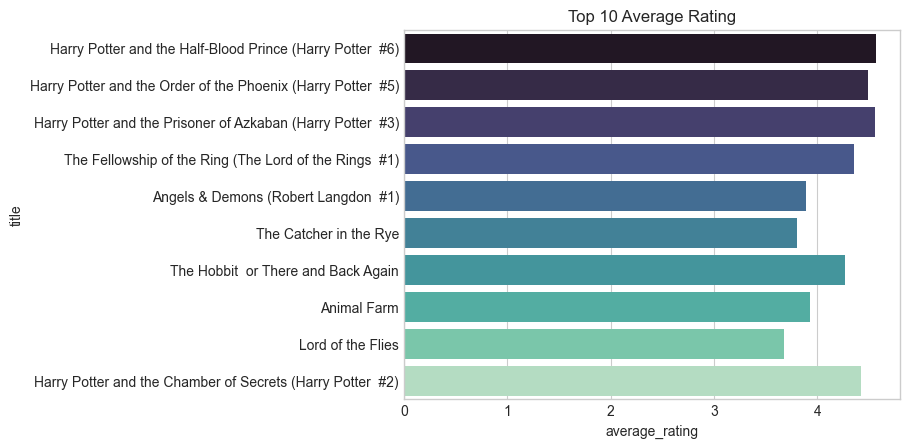

In [9]:
topAverageRating = BooksData[BooksData['ratings_count'] > 2000000]
topAverageRating.sort_values(by='average_rating',ascending=False)
topAverageRating = topAverageRating.iloc[:10]
plt.style.use('seaborn-whitegrid')
plt.title("Top 10 Average Rating")
sns.barplot(data=topAverageRating, x = 'average_rating', y = 'title', palette='mako')

Top Ten Authors by Number of BooksAuthors With Most Books 

In [10]:
#Top authors with most books
topTenAuthors = BooksData['authors'].value_counts()
topAuthors = topTenAuthors.sort_values(ascending = False).iloc[:10]
names = topAuthors.index 
values = topAuthors.values
figure = px.pie(topAuthors, names=names, values=values, hole=0.4, title="Top Ten Authors by Number of Books")
figure.show()

## Top Five Novels By Language

In [11]:

bookLang = BooksData['language_code'].value_counts()
sortedLang = bookLang.sort_values(ascending=False).iloc[:5]
values = sortedLang.values
names = sortedLang.index
figure = px.pie(bookLang, names=names,values=values, title="Top five novels by language ")
figure.show()


The Top 10 Books Based on Ratings

In [12]:
booksRating = BooksData.sort_values(by = 'ratings_count',ascending=False)
topBooksRating = booksRating.iloc[:10]
names = topBooksRating['title'] 
values = topBooksRating['ratings_count']
figure = px.pie(topBooksRating, names=names, values=values, hole=0.4, title="The Top 10 Books Based on Ratings")
figure.show()


## Books Recommendation System

In [13]:
#features = [authors,average_rating,language_code,ratings_count]
authorsDf = pd.get_dummies(BooksData['authors'])
languageDf = pd.get_dummies(BooksData['language_code'])



In [14]:
# scaling features and model
scaler = MinMaxScaler()
features = pd.concat([languageDf,BooksData['average_rating'],BooksData['ratings_count']], axis=1)
features = scaler.fit_transform(features)

model  = neighbors.NearestNeighbors(n_neighbors=7, algorithm='ball_tree')
model.fit(features)
Id,listId = model.kneighbors(features)

In [17]:
def Recommender(bookTitle):
    BookList = []
    bookId = BooksData[BooksData['title'] == bookTitle].index
    bookId = bookId[0]
    for newId in listId[bookId]:
        BookList.append(BooksData.loc[newId].title)
    return BookList


try:
   userInput = input("Enter book title: ")
   RecommendedBooks = Recommender(userInput)
   figure = px.pie(names=RecommendedBooks,title="Other Six(6) Recommendation Books")
   figure.show()
except:
    print("Book Not Found!")
    print("Search Different Book")
